In [1]:
#Import the libraries
from __future__ import absolute_import, division, print_function
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

Using TensorFlow backend.


In [2]:

carbon = pd.read_csv("carbonppm_maunaloa.csv",sep=",", quotechar="'", skiprows=(0,2), header=0, skipfooter=1, parse_dates=[[0,1,2]], engine='python')
north_sea_ice = pd.read_csv("northseaice.csv",sep=",", quotechar="'", skiprows=(0,2), header=0, skipfooter=1, parse_dates=[[0,1,2]], engine='python')
sea_ice = pd.read_csv("southseaice.csv",sep=",", quotechar="'", skiprows=(0,2), header=0, skipfooter=1, parse_dates=[[0,1,2]], engine='python')
print(sea_ice)

      Year_Month_Day  Extent  Missing
0         1978-10-26  17.624      0.0
1         1978-10-28  17.803      0.0
2         1978-10-30  17.670      0.0
3         1978-11-01  17.527      0.0
4         1978-11-03  17.486      0.0
5         1978-11-05  17.343      0.0
6         1978-11-07  17.157      0.0
7         1978-11-09  17.028      0.0
8         1978-11-11  16.815      0.0
9         1978-11-13  16.371      0.0
10        1978-11-15  16.176      0.0
11        1978-11-17  15.520      0.0
12        1978-11-19  15.267      0.0
13        1978-11-21  15.027      0.0
14        1978-11-23  14.681      0.0
15        1978-11-25  14.449      0.0
16        1978-11-27  13.980      0.0
17        1978-11-29  13.619      0.0
18        1978-12-01  13.330      0.0
19        1978-12-03  13.097      0.0
20        1978-12-05  12.829      0.0
21        1978-12-07  12.436      0.0
22        1978-12-09  11.963      0.0
23        1978-12-11  11.652      0.0
24        1978-12-13  11.148      0.0
25        19

/Users/mahbuburrahman/virtualenv/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


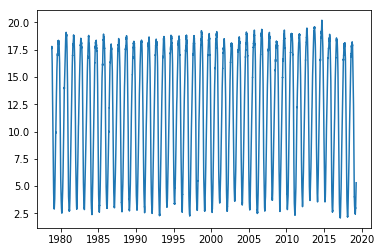

In [3]:
#print(north_sea_ice)
plt.plot(sea_ice.Year_Month_Day, sea_ice.Extent)

      Year_Month_Day  Extent  Missing  Date_Num  Year Month Day
0         1978-10-26  17.624      0.0    722383  1978    10  26
1         1978-10-28  17.803      0.0    722385  1978    10  28
2         1978-10-30  17.670      0.0    722387  1978    10  30
3         1978-11-01  17.527      0.0    722389  1978    11  01
4         1978-11-03  17.486      0.0    722391  1978    11  03
5         1978-11-05  17.343      0.0    722393  1978    11  05
6         1978-11-07  17.157      0.0    722395  1978    11  07
7         1978-11-09  17.028      0.0    722397  1978    11  09
8         1978-11-11  16.815      0.0    722399  1978    11  11
9         1978-11-13  16.371      0.0    722401  1978    11  13
10        1978-11-15  16.176      0.0    722403  1978    11  15
11        1978-11-17  15.520      0.0    722405  1978    11  17
12        1978-11-19  15.267      0.0    722407  1978    11  19
13        1978-11-21  15.027      0.0    722409  1978    11  21
14        1978-11-23  14.681      0.0   

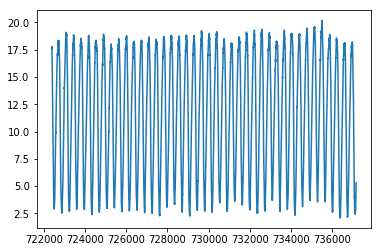

In [4]:
#Preprocessing and segmenting the data set
#print(sea_ice)
sea_ice['Year_Month_Day'] = pd.to_datetime(sea_ice['Year_Month_Day'])
sea_ice['Date_Num'] = sea_ice['Year_Month_Day'].map(dt.datetime.toordinal)
sea_ice['Year_Month_Day'] = sea_ice['Year_Month_Day'].astype(str)
sea_ice['Year'] = sea_ice['Year_Month_Day'].apply(lambda x : x.split('-')[0])
sea_ice['Month'] = sea_ice['Year_Month_Day'].apply(lambda x: x.split('-')[1])
sea_ice['Day'] = sea_ice['Year_Month_Day'].apply(lambda x: x.split('-')[2])
print(sea_ice)
plt.plot(sea_ice.Date_Num,sea_ice.Extent)

      Year_Month_Day  Extent  Missing  Date_Num  Year Month Day
13026     2019-01-01   5.201    0.000    737060  2019    01  01
13027     2019-01-02   5.035    0.000    737061  2019    01  02
13028     2019-01-03   4.889    0.000    737062  2019    01  03
13029     2019-01-04   4.784    0.000    737063  2019    01  04
13030     2019-01-05   4.654    0.000    737064  2019    01  05
13031     2019-01-06   4.591    0.000    737065  2019    01  06
13032     2019-01-07   4.511    0.000    737066  2019    01  07
13033     2019-01-08   4.392    0.000    737067  2019    01  08
13034     2019-01-09   4.287    0.000    737068  2019    01  09
13035     2019-01-10   4.149    0.000    737069  2019    01  10
13036     2019-01-11   4.014    0.000    737070  2019    01  11
13037     2019-01-12   4.020    0.000    737071  2019    01  12
13038     2019-01-13   3.913    0.000    737072  2019    01  13
13039     2019-01-14   3.801    0.001    737073  2019    01  14
13040     2019-01-15   3.752    0.000   

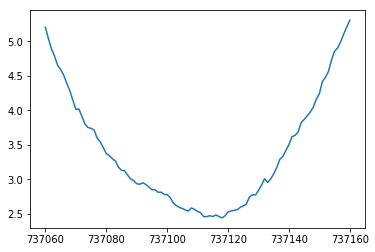

In [7]:
sea_ice_grp = sea_ice.groupby('Year')
one_sea_ice_group = sea_ice_grp.get_group('2019')
print(one_sea_ice_group)
plt.plot(one_sea_ice_group.Date_Num,one_sea_ice_group.Extent)

/Users/mahbuburrahman/virtualenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


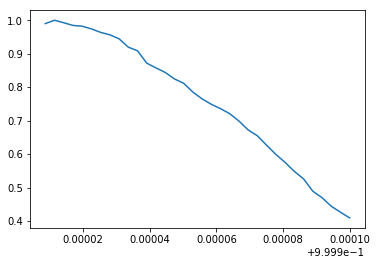

In [149]:
#Data processing and normalization 
processed_data = one_sea_ice_group[['Date_Num','Extent']]
#processed_data['Date_Num'] = processed_data['Date_Num'].apply(lambda x: x.replace('-',''))
#processed_data['Date_Num'] = processed_data['Date_Num'].astype(float)
processed_data['Extent'] = processed_data['Extent'].astype(float)
processed_data = processed_data.apply(lambda x: x/x.max(),axis=0)
plt.plot(processed_data['Date_Num'],processed_data['Extent'])


In [150]:
#Tensorflow modeling part

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(np.random.normal(), name = "W") 
b = tf.Variable(np.random.normal(), name = "b") 

learning_rate = 0.01
training_epochs = 5000
n = len(processed_data['Date_Num'])


# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
#y_pred = tf.add(tf.multiply(tf.tanh(X), W), b)
#y_pred = tf.add(tf.multiply(tf.exp(X), W), b)
# Mean Squared Error Cost Function 
#cost = tf.reduce_mean(tf.square(y_pred - Y))
cost = tf.reduce_mean(tf.square(y_pred - Y))
  
# Gradient Descent Optimizer 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
# Global Variables Initializer 
init = tf.global_variables_initializer() 

nonlinear = 1

x = processed_data['Date_Num']
y = processed_data['Extent']

if nonlinear:
   
    # Starting the Tensorflow Session 
    with tf.Session() as sess: 
      
        # Initializing the Variables 
        sess.run(init) 
      
        # Iterating through all the epochs 
        for epoch in range(training_epochs): 
          
            # Feeding each data point into the optimizer using Feed Dictionary 
            for (_x, _y) in zip(x, y): 
                sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
            # Displaying the result after every 50 epochs 
            if (epoch + 1) % 100 == 0: 
                # Calculating the cost a every epoch 
                c = sess.run(cost, feed_dict = {X : x, Y : y}) 
                print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
        # Storing necessary values to be used outside the Session 
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 


Epoch 100 : cost = 0.040843777 W = 0.18990855 b = 0.49257633
Epoch 200 : cost = 0.040843774 W = 0.18973587 b = 0.492749
Epoch 300 : cost = 0.040843774 W = 0.18956469 b = 0.4929202
Epoch 400 : cost = 0.040843774 W = 0.18939382 b = 0.49309102
Epoch 500 : cost = 0.04084378 W = 0.18922296 b = 0.49326184
Epoch 600 : cost = 0.040843766 W = 0.18905209 b = 0.4934328
Epoch 700 : cost = 0.040843766 W = 0.18888146 b = 0.49360338
Epoch 800 : cost = 0.040843762 W = 0.18871158 b = 0.49377325
Epoch 900 : cost = 0.04084376 W = 0.18854171 b = 0.49394313
Epoch 1000 : cost = 0.040843755 W = 0.18837184 b = 0.494113
Epoch 1100 : cost = 0.040843755 W = 0.18820196 b = 0.49428287
Epoch 1200 : cost = 0.040843748 W = 0.18803209 b = 0.49445277
Epoch 1300 : cost = 0.040843748 W = 0.18786222 b = 0.49462265
Epoch 1400 : cost = 0.04084374 W = 0.18769234 b = 0.49479252
Epoch 1500 : cost = 0.04084375 W = 0.18752247 b = 0.49496233
Epoch 1600 : cost = 0.04084374 W = 0.1873523 b = 0.49513257
Epoch 1700 : cost = 0.0408437

Weight = 0.18149231 bias = 0.50099236 



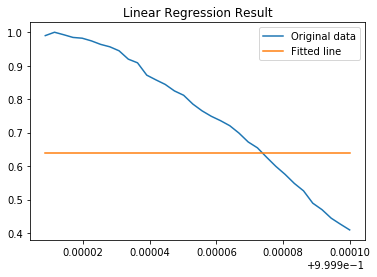

In [151]:
predictions = weight * np.tanh(x) + bias
print("Weight =", weight, "bias =", bias, '\n') 
# Plotting the Results 
plt.plot(x, y, label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

34


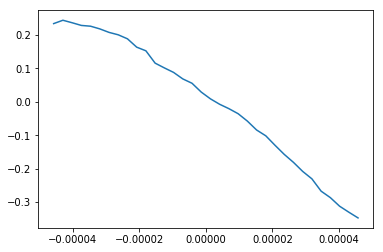

In [154]:
#Another type of normalization
tempx = (processed_data['Date_Num']-processed_data['Date_Num'].mean())/processed_data['Date_Num'].max()
tempy = (processed_data['Extent']-processed_data['Extent'].mean())/processed_data['Extent'].max()
print(tempx.shape[0])
plt.plot(tempx,tempy)

In [155]:
from scipy import optimize

def test_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(test_func, tempx, tempy,
                                               p0=[-0.1, 0.2])

print(params)

[-6.84898938e+03 -4.80802457e-07]


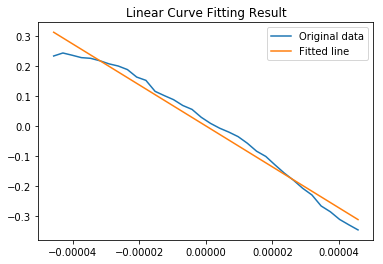

In [156]:
plt.plot(tempx, tempy, label ='Original data') 
plt.plot(tempx, test_func(tempx, params[0], params[1]), label ='Fitted line') 
plt.title('Linear Curve Fitting Result') 
plt.legend() 
plt.show() 

In [131]:
#Keras model backed up by tensor flow
model = Sequential()
model.add(Dense(1, activation="tanh", input_dim=1, kernel_initializer="uniform"))
#model.add(Dense(100, activation="relu",kernel_initializer="uniform"))
#model.add(Dense(128, activation="tanh",kernel_initializer="normal"))
#model.add(Dense(128, activation="relu",kernel_initializer="normal"))
#model.add(Dense(1, activation="tanh"))
# Compile model
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='mse', optimizer=sgd, metrics=['mean_absolute_error'])
# Fit the model
model.fit(tempx, tempy, epochs=2000, batch_size=10,  verbose=2, validation_split=0.3,shuffle=True)
predictions = model.predict(tempx,batch_size=10)


Train on 127 samples, validate on 55 samples
Epoch 1/2000
 - 1s - loss: 0.0962 - mean_absolute_error: 0.2822 - val_loss: 0.0997 - val_mean_absolute_error: 0.2882
Epoch 2/2000
 - 0s - loss: 0.0944 - mean_absolute_error: 0.2807 - val_loss: 0.1188 - val_mean_absolute_error: 0.3130
Epoch 3/2000
 - 0s - loss: 0.1045 - mean_absolute_error: 0.2917 - val_loss: 0.0985 - val_mean_absolute_error: 0.2865
Epoch 4/2000
 - 0s - loss: 0.1091 - mean_absolute_error: 0.2953 - val_loss: 0.0622 - val_mean_absolute_error: 0.2293
Epoch 5/2000
 - 0s - loss: 0.0931 - mean_absolute_error: 0.2766 - val_loss: 0.1432 - val_mean_absolute_error: 0.3425
Epoch 6/2000
 - 0s - loss: 0.0996 - mean_absolute_error: 0.2853 - val_loss: 0.1116 - val_mean_absolute_error: 0.3040
Epoch 7/2000
 - 0s - loss: 0.0996 - mean_absolute_error: 0.2835 - val_loss: 0.0642 - val_mean_absolute_error: 0.2332
Epoch 8/2000
 - 0s - loss: 0.0999 - mean_absolute_error: 0.2857 - val_loss: 0.1490 - val_mean_absolute_error: 0.3493
Epoch 9/2000
 - 0s 

Epoch 71/2000
 - 0s - loss: 0.0946 - mean_absolute_error: 0.2759 - val_loss: 0.1038 - val_mean_absolute_error: 0.2937
Epoch 72/2000
 - 0s - loss: 0.0957 - mean_absolute_error: 0.2816 - val_loss: 0.1158 - val_mean_absolute_error: 0.3093
Epoch 73/2000
 - 0s - loss: 0.0943 - mean_absolute_error: 0.2781 - val_loss: 0.0901 - val_mean_absolute_error: 0.2747
Epoch 74/2000
 - 0s - loss: 0.0979 - mean_absolute_error: 0.2843 - val_loss: 0.1132 - val_mean_absolute_error: 0.3060
Epoch 75/2000
 - 0s - loss: 0.0953 - mean_absolute_error: 0.2817 - val_loss: 0.1307 - val_mean_absolute_error: 0.3278
Epoch 76/2000
 - 0s - loss: 0.0957 - mean_absolute_error: 0.2795 - val_loss: 0.0898 - val_mean_absolute_error: 0.2744
Epoch 77/2000
 - 0s - loss: 0.0934 - mean_absolute_error: 0.2794 - val_loss: 0.1090 - val_mean_absolute_error: 0.3006
Epoch 78/2000
 - 0s - loss: 0.0976 - mean_absolute_error: 0.2854 - val_loss: 0.1277 - val_mean_absolute_error: 0.3242
Epoch 79/2000
 - 0s - loss: 0.0958 - mean_absolute_error

 - 0s - loss: 0.0962 - mean_absolute_error: 0.2821 - val_loss: 0.0965 - val_mean_absolute_error: 0.2838
Epoch 141/2000
 - 0s - loss: 0.0947 - mean_absolute_error: 0.2778 - val_loss: 0.0902 - val_mean_absolute_error: 0.2749
Epoch 142/2000
 - 0s - loss: 0.0970 - mean_absolute_error: 0.2775 - val_loss: 0.1899 - val_mean_absolute_error: 0.3935
Epoch 143/2000
 - 0s - loss: 0.1117 - mean_absolute_error: 0.2906 - val_loss: 0.0621 - val_mean_absolute_error: 0.2292
Epoch 144/2000
 - 0s - loss: 0.0954 - mean_absolute_error: 0.2757 - val_loss: 0.1240 - val_mean_absolute_error: 0.3196
Epoch 145/2000
 - 0s - loss: 0.0994 - mean_absolute_error: 0.2851 - val_loss: 0.1195 - val_mean_absolute_error: 0.3140
Epoch 146/2000
 - 0s - loss: 0.0996 - mean_absolute_error: 0.2843 - val_loss: 0.1461 - val_mean_absolute_error: 0.3459
Epoch 147/2000
 - 0s - loss: 0.1017 - mean_absolute_error: 0.2857 - val_loss: 0.0723 - val_mean_absolute_error: 0.2474
Epoch 148/2000
 - 0s - loss: 0.0985 - mean_absolute_error: 0.28

Epoch 209/2000
 - 0s - loss: 0.0922 - mean_absolute_error: 0.2755 - val_loss: 0.1201 - val_mean_absolute_error: 0.3147
Epoch 210/2000
 - 0s - loss: 0.0928 - mean_absolute_error: 0.2777 - val_loss: 0.0909 - val_mean_absolute_error: 0.2759
Epoch 211/2000
 - 0s - loss: 0.0936 - mean_absolute_error: 0.2796 - val_loss: 0.1160 - val_mean_absolute_error: 0.3096
Epoch 212/2000
 - 0s - loss: 0.0977 - mean_absolute_error: 0.2825 - val_loss: 0.1525 - val_mean_absolute_error: 0.3533
Epoch 213/2000
 - 0s - loss: 0.0977 - mean_absolute_error: 0.2824 - val_loss: 0.1150 - val_mean_absolute_error: 0.3083
Epoch 214/2000
 - 0s - loss: 0.0925 - mean_absolute_error: 0.2775 - val_loss: 0.0792 - val_mean_absolute_error: 0.2586
Epoch 215/2000
 - 0s - loss: 0.1086 - mean_absolute_error: 0.2938 - val_loss: 0.1549 - val_mean_absolute_error: 0.3559
Epoch 216/2000
 - 0s - loss: 0.0967 - mean_absolute_error: 0.2815 - val_loss: 0.1128 - val_mean_absolute_error: 0.3055
Epoch 217/2000
 - 0s - loss: 0.0953 - mean_absol

Epoch 278/2000
 - 0s - loss: 0.0929 - mean_absolute_error: 0.2772 - val_loss: 0.0888 - val_mean_absolute_error: 0.2730
Epoch 279/2000
 - 0s - loss: 0.0951 - mean_absolute_error: 0.2801 - val_loss: 0.0889 - val_mean_absolute_error: 0.2731
Epoch 280/2000
 - 0s - loss: 0.0954 - mean_absolute_error: 0.2822 - val_loss: 0.1024 - val_mean_absolute_error: 0.2918
Epoch 281/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2768 - val_loss: 0.0862 - val_mean_absolute_error: 0.2692
Epoch 282/2000
 - 0s - loss: 0.0970 - mean_absolute_error: 0.2825 - val_loss: 0.1271 - val_mean_absolute_error: 0.3235
Epoch 283/2000
 - 0s - loss: 0.0982 - mean_absolute_error: 0.2847 - val_loss: 0.1377 - val_mean_absolute_error: 0.3361
Epoch 284/2000
 - 0s - loss: 0.0946 - mean_absolute_error: 0.2777 - val_loss: 0.0838 - val_mean_absolute_error: 0.2656
Epoch 285/2000
 - 0s - loss: 0.0948 - mean_absolute_error: 0.2793 - val_loss: 0.1281 - val_mean_absolute_error: 0.3247
Epoch 286/2000
 - 0s - loss: 0.0976 - mean_absol

Epoch 347/2000
 - 0s - loss: 0.0933 - mean_absolute_error: 0.2783 - val_loss: 0.0972 - val_mean_absolute_error: 0.2849
Epoch 348/2000
 - 0s - loss: 0.0932 - mean_absolute_error: 0.2791 - val_loss: 0.1013 - val_mean_absolute_error: 0.2904
Epoch 349/2000
 - 0s - loss: 0.0947 - mean_absolute_error: 0.2798 - val_loss: 0.1485 - val_mean_absolute_error: 0.3487
Epoch 350/2000
 - 0s - loss: 0.0943 - mean_absolute_error: 0.2779 - val_loss: 0.0817 - val_mean_absolute_error: 0.2624
Epoch 351/2000
 - 0s - loss: 0.0955 - mean_absolute_error: 0.2806 - val_loss: 0.1128 - val_mean_absolute_error: 0.3055
Epoch 352/2000
 - 0s - loss: 0.0943 - mean_absolute_error: 0.2806 - val_loss: 0.0987 - val_mean_absolute_error: 0.2868
Epoch 353/2000
 - 0s - loss: 0.0936 - mean_absolute_error: 0.2776 - val_loss: 0.0969 - val_mean_absolute_error: 0.2843
Epoch 354/2000
 - 0s - loss: 0.0935 - mean_absolute_error: 0.2786 - val_loss: 0.1043 - val_mean_absolute_error: 0.2943
Epoch 355/2000
 - 0s - loss: 0.0936 - mean_absol

Epoch 416/2000
 - 0s - loss: 0.1011 - mean_absolute_error: 0.2877 - val_loss: 0.1090 - val_mean_absolute_error: 0.3006
Epoch 417/2000
 - 0s - loss: 0.0936 - mean_absolute_error: 0.2784 - val_loss: 0.0887 - val_mean_absolute_error: 0.2728
Epoch 418/2000
 - 0s - loss: 0.0947 - mean_absolute_error: 0.2792 - val_loss: 0.0982 - val_mean_absolute_error: 0.2862
Epoch 419/2000
 - 0s - loss: 0.0946 - mean_absolute_error: 0.2794 - val_loss: 0.1363 - val_mean_absolute_error: 0.3344
Epoch 420/2000
 - 0s - loss: 0.0976 - mean_absolute_error: 0.2836 - val_loss: 0.1164 - val_mean_absolute_error: 0.3101
Epoch 421/2000
 - 0s - loss: 0.0935 - mean_absolute_error: 0.2785 - val_loss: 0.0847 - val_mean_absolute_error: 0.2670
Epoch 422/2000
 - 0s - loss: 0.1041 - mean_absolute_error: 0.2864 - val_loss: 0.1930 - val_mean_absolute_error: 0.3968
Epoch 423/2000
 - 0s - loss: 0.1008 - mean_absolute_error: 0.2792 - val_loss: 0.0758 - val_mean_absolute_error: 0.2531
Epoch 424/2000
 - 0s - loss: 0.0985 - mean_absol

Epoch 485/2000
 - 0s - loss: 0.0935 - mean_absolute_error: 0.2754 - val_loss: 0.1620 - val_mean_absolute_error: 0.3638
Epoch 486/2000
 - 0s - loss: 0.1023 - mean_absolute_error: 0.2833 - val_loss: 0.0797 - val_mean_absolute_error: 0.2593
Epoch 487/2000
 - 0s - loss: 0.0932 - mean_absolute_error: 0.2766 - val_loss: 0.1211 - val_mean_absolute_error: 0.3159
Epoch 488/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2770 - val_loss: 0.0846 - val_mean_absolute_error: 0.2669
Epoch 489/2000
 - 0s - loss: 0.0945 - mean_absolute_error: 0.2787 - val_loss: 0.1115 - val_mean_absolute_error: 0.3038
Epoch 490/2000
 - 0s - loss: 0.0958 - mean_absolute_error: 0.2814 - val_loss: 0.1248 - val_mean_absolute_error: 0.3206
Epoch 491/2000
 - 0s - loss: 0.1060 - mean_absolute_error: 0.2861 - val_loss: 0.0699 - val_mean_absolute_error: 0.2433
Epoch 492/2000
 - 0s - loss: 0.0992 - mean_absolute_error: 0.2836 - val_loss: 0.0993 - val_mean_absolute_error: 0.2877
Epoch 493/2000
 - 0s - loss: 0.0960 - mean_absol

Epoch 554/2000
 - 0s - loss: 0.0939 - mean_absolute_error: 0.2774 - val_loss: 0.0866 - val_mean_absolute_error: 0.2698
Epoch 555/2000
 - 0s - loss: 0.0953 - mean_absolute_error: 0.2800 - val_loss: 0.0994 - val_mean_absolute_error: 0.2878
Epoch 556/2000
 - 0s - loss: 0.0940 - mean_absolute_error: 0.2780 - val_loss: 0.1342 - val_mean_absolute_error: 0.3320
Epoch 557/2000
 - 0s - loss: 0.0965 - mean_absolute_error: 0.2758 - val_loss: 0.0631 - val_mean_absolute_error: 0.2311
Epoch 558/2000
 - 0s - loss: 0.1066 - mean_absolute_error: 0.2894 - val_loss: 0.1547 - val_mean_absolute_error: 0.3557
Epoch 559/2000
 - 0s - loss: 0.0924 - mean_absolute_error: 0.2776 - val_loss: 0.0807 - val_mean_absolute_error: 0.2608
Epoch 560/2000
 - 0s - loss: 0.1007 - mean_absolute_error: 0.2885 - val_loss: 0.0770 - val_mean_absolute_error: 0.2551
Epoch 561/2000
 - 0s - loss: 0.0963 - mean_absolute_error: 0.2837 - val_loss: 0.1444 - val_mean_absolute_error: 0.3439
Epoch 562/2000
 - 0s - loss: 0.0962 - mean_absol

Epoch 623/2000
 - 0s - loss: 0.0941 - mean_absolute_error: 0.2786 - val_loss: 0.0946 - val_mean_absolute_error: 0.2812
Epoch 624/2000
 - 0s - loss: 0.0953 - mean_absolute_error: 0.2823 - val_loss: 0.1118 - val_mean_absolute_error: 0.3042
Epoch 625/2000
 - 0s - loss: 0.0943 - mean_absolute_error: 0.2803 - val_loss: 0.1182 - val_mean_absolute_error: 0.3123
Epoch 626/2000
 - 0s - loss: 0.0949 - mean_absolute_error: 0.2810 - val_loss: 0.1082 - val_mean_absolute_error: 0.2996
Epoch 627/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2796 - val_loss: 0.1386 - val_mean_absolute_error: 0.3371
Epoch 628/2000
 - 0s - loss: 0.1004 - mean_absolute_error: 0.2811 - val_loss: 0.0590 - val_mean_absolute_error: 0.2231
Epoch 629/2000
 - 0s - loss: 0.1030 - mean_absolute_error: 0.2890 - val_loss: 0.0992 - val_mean_absolute_error: 0.2875
Epoch 630/2000
 - 0s - loss: 0.0952 - mean_absolute_error: 0.2805 - val_loss: 0.1321 - val_mean_absolute_error: 0.3295
Epoch 631/2000
 - 0s - loss: 0.0999 - mean_absol

Epoch 692/2000
 - 0s - loss: 0.0973 - mean_absolute_error: 0.2836 - val_loss: 0.1076 - val_mean_absolute_error: 0.2987
Epoch 693/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2765 - val_loss: 0.1061 - val_mean_absolute_error: 0.2967
Epoch 694/2000
 - 0s - loss: 0.0955 - mean_absolute_error: 0.2808 - val_loss: 0.1459 - val_mean_absolute_error: 0.3456
Epoch 695/2000
 - 0s - loss: 0.1008 - mean_absolute_error: 0.2792 - val_loss: 0.0768 - val_mean_absolute_error: 0.2548
Epoch 696/2000
 - 0s - loss: 0.0974 - mean_absolute_error: 0.2813 - val_loss: 0.1148 - val_mean_absolute_error: 0.3080
Epoch 697/2000
 - 0s - loss: 0.0948 - mean_absolute_error: 0.2812 - val_loss: 0.1132 - val_mean_absolute_error: 0.3060
Epoch 698/2000
 - 0s - loss: 0.0945 - mean_absolute_error: 0.2806 - val_loss: 0.0866 - val_mean_absolute_error: 0.2698
Epoch 699/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2803 - val_loss: 0.1071 - val_mean_absolute_error: 0.2980
Epoch 700/2000
 - 0s - loss: 0.0934 - mean_absol

Epoch 761/2000
 - 0s - loss: 0.0941 - mean_absolute_error: 0.2808 - val_loss: 0.1164 - val_mean_absolute_error: 0.3101
Epoch 762/2000
 - 0s - loss: 0.0975 - mean_absolute_error: 0.2845 - val_loss: 0.1582 - val_mean_absolute_error: 0.3596
Epoch 763/2000
 - 0s - loss: 0.0978 - mean_absolute_error: 0.2816 - val_loss: 0.0898 - val_mean_absolute_error: 0.2743
Epoch 764/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2809 - val_loss: 0.1031 - val_mean_absolute_error: 0.2927
Epoch 765/2000
 - 0s - loss: 0.0948 - mean_absolute_error: 0.2806 - val_loss: 0.1050 - val_mean_absolute_error: 0.2952
Epoch 766/2000
 - 0s - loss: 0.0959 - mean_absolute_error: 0.2815 - val_loss: 0.1145 - val_mean_absolute_error: 0.3077
Epoch 767/2000
 - 0s - loss: 0.0965 - mean_absolute_error: 0.2750 - val_loss: 0.0590 - val_mean_absolute_error: 0.2230
Epoch 768/2000
 - 0s - loss: 0.1100 - mean_absolute_error: 0.2944 - val_loss: 0.1380 - val_mean_absolute_error: 0.3364
Epoch 769/2000
 - 0s - loss: 0.0970 - mean_absol

Epoch 830/2000
 - 0s - loss: 0.0986 - mean_absolute_error: 0.2860 - val_loss: 0.1247 - val_mean_absolute_error: 0.3205
Epoch 831/2000
 - 0s - loss: 0.0967 - mean_absolute_error: 0.2821 - val_loss: 0.0927 - val_mean_absolute_error: 0.2784
Epoch 832/2000
 - 0s - loss: 0.0925 - mean_absolute_error: 0.2768 - val_loss: 0.1113 - val_mean_absolute_error: 0.3036
Epoch 833/2000
 - 0s - loss: 0.0943 - mean_absolute_error: 0.2795 - val_loss: 0.1001 - val_mean_absolute_error: 0.2887
Epoch 834/2000
 - 0s - loss: 0.0959 - mean_absolute_error: 0.2794 - val_loss: 0.0855 - val_mean_absolute_error: 0.2682
Epoch 835/2000
 - 0s - loss: 0.1004 - mean_absolute_error: 0.2862 - val_loss: 0.1465 - val_mean_absolute_error: 0.3464
Epoch 836/2000
 - 0s - loss: 0.0989 - mean_absolute_error: 0.2843 - val_loss: 0.1303 - val_mean_absolute_error: 0.3274
Epoch 837/2000
 - 0s - loss: 0.0970 - mean_absolute_error: 0.2830 - val_loss: 0.0981 - val_mean_absolute_error: 0.2860
Epoch 838/2000
 - 0s - loss: 0.0947 - mean_absol

Epoch 899/2000
 - 0s - loss: 0.0926 - mean_absolute_error: 0.2763 - val_loss: 0.1231 - val_mean_absolute_error: 0.3184
Epoch 900/2000
 - 0s - loss: 0.0928 - mean_absolute_error: 0.2771 - val_loss: 0.0782 - val_mean_absolute_error: 0.2570
Epoch 901/2000
 - 0s - loss: 0.1027 - mean_absolute_error: 0.2889 - val_loss: 0.1719 - val_mean_absolute_error: 0.3744
Epoch 902/2000
 - 0s - loss: 0.1003 - mean_absolute_error: 0.2849 - val_loss: 0.1137 - val_mean_absolute_error: 0.3067
Epoch 903/2000
 - 0s - loss: 0.1010 - mean_absolute_error: 0.2828 - val_loss: 0.0729 - val_mean_absolute_error: 0.2485
Epoch 904/2000
 - 0s - loss: 0.1041 - mean_absolute_error: 0.2896 - val_loss: 0.0789 - val_mean_absolute_error: 0.2581
Epoch 905/2000
 - 0s - loss: 0.0964 - mean_absolute_error: 0.2783 - val_loss: 0.1514 - val_mean_absolute_error: 0.3520
Epoch 906/2000
 - 0s - loss: 0.0984 - mean_absolute_error: 0.2811 - val_loss: 0.0947 - val_mean_absolute_error: 0.2813
Epoch 907/2000
 - 0s - loss: 0.0921 - mean_absol

Epoch 968/2000
 - 0s - loss: 0.0950 - mean_absolute_error: 0.2817 - val_loss: 0.1200 - val_mean_absolute_error: 0.3146
Epoch 969/2000
 - 0s - loss: 0.0963 - mean_absolute_error: 0.2825 - val_loss: 0.1216 - val_mean_absolute_error: 0.3165
Epoch 970/2000
 - 0s - loss: 0.0976 - mean_absolute_error: 0.2779 - val_loss: 0.0878 - val_mean_absolute_error: 0.2716
Epoch 971/2000
 - 0s - loss: 0.1047 - mean_absolute_error: 0.2865 - val_loss: 0.1983 - val_mean_absolute_error: 0.4024
Epoch 972/2000
 - 0s - loss: 0.1121 - mean_absolute_error: 0.2929 - val_loss: 0.0769 - val_mean_absolute_error: 0.2549
Epoch 973/2000
 - 0s - loss: 0.0902 - mean_absolute_error: 0.2722 - val_loss: 0.1490 - val_mean_absolute_error: 0.3493
Epoch 974/2000
 - 0s - loss: 0.0958 - mean_absolute_error: 0.2773 - val_loss: 0.0706 - val_mean_absolute_error: 0.2446
Epoch 975/2000
 - 0s - loss: 0.0936 - mean_absolute_error: 0.2759 - val_loss: 0.1497 - val_mean_absolute_error: 0.3501
Epoch 976/2000
 - 0s - loss: 0.0967 - mean_absol

Epoch 1037/2000
 - 0s - loss: 0.0980 - mean_absolute_error: 0.2831 - val_loss: 0.1395 - val_mean_absolute_error: 0.3381
Epoch 1038/2000
 - 0s - loss: 0.1007 - mean_absolute_error: 0.2822 - val_loss: 0.0735 - val_mean_absolute_error: 0.2494
Epoch 1039/2000
 - 0s - loss: 0.0939 - mean_absolute_error: 0.2782 - val_loss: 0.1092 - val_mean_absolute_error: 0.3008
Epoch 1040/2000
 - 0s - loss: 0.0949 - mean_absolute_error: 0.2809 - val_loss: 0.1014 - val_mean_absolute_error: 0.2904
Epoch 1041/2000
 - 0s - loss: 0.1030 - mean_absolute_error: 0.2939 - val_loss: 0.0931 - val_mean_absolute_error: 0.2790
Epoch 1042/2000
 - 0s - loss: 0.0967 - mean_absolute_error: 0.2790 - val_loss: 0.0871 - val_mean_absolute_error: 0.2705
Epoch 1043/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2798 - val_loss: 0.1106 - val_mean_absolute_error: 0.3027
Epoch 1044/2000
 - 0s - loss: 0.0968 - mean_absolute_error: 0.2825 - val_loss: 0.1454 - val_mean_absolute_error: 0.3451
Epoch 1045/2000
 - 0s - loss: 0.1067 - m

Epoch 1106/2000
 - 0s - loss: 0.0955 - mean_absolute_error: 0.2788 - val_loss: 0.0819 - val_mean_absolute_error: 0.2627
Epoch 1107/2000
 - 0s - loss: 0.0982 - mean_absolute_error: 0.2814 - val_loss: 0.0756 - val_mean_absolute_error: 0.2529
Epoch 1108/2000
 - 0s - loss: 0.0978 - mean_absolute_error: 0.2811 - val_loss: 0.1111 - val_mean_absolute_error: 0.3034
Epoch 1109/2000
 - 0s - loss: 0.0983 - mean_absolute_error: 0.2842 - val_loss: 0.1410 - val_mean_absolute_error: 0.3399
Epoch 1110/2000
 - 0s - loss: 0.1074 - mean_absolute_error: 0.2932 - val_loss: 0.0848 - val_mean_absolute_error: 0.2672
Epoch 1111/2000
 - 0s - loss: 0.0920 - mean_absolute_error: 0.2762 - val_loss: 0.1539 - val_mean_absolute_error: 0.3548
Epoch 1112/2000
 - 0s - loss: 0.0960 - mean_absolute_error: 0.2806 - val_loss: 0.0890 - val_mean_absolute_error: 0.2732
Epoch 1113/2000
 - 0s - loss: 0.0961 - mean_absolute_error: 0.2803 - val_loss: 0.0794 - val_mean_absolute_error: 0.2589
Epoch 1114/2000
 - 0s - loss: 0.0945 - m

Epoch 1175/2000
 - 0s - loss: 0.0990 - mean_absolute_error: 0.2825 - val_loss: 0.0707 - val_mean_absolute_error: 0.2447
Epoch 1176/2000
 - 0s - loss: 0.0960 - mean_absolute_error: 0.2807 - val_loss: 0.1242 - val_mean_absolute_error: 0.3198
Epoch 1177/2000
 - 0s - loss: 0.0952 - mean_absolute_error: 0.2797 - val_loss: 0.0789 - val_mean_absolute_error: 0.2581
Epoch 1178/2000
 - 0s - loss: 0.0954 - mean_absolute_error: 0.2817 - val_loss: 0.1013 - val_mean_absolute_error: 0.2903
Epoch 1179/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2803 - val_loss: 0.1212 - val_mean_absolute_error: 0.3161
Epoch 1180/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2769 - val_loss: 0.0899 - val_mean_absolute_error: 0.2746
Epoch 1181/2000
 - 0s - loss: 0.0949 - mean_absolute_error: 0.2789 - val_loss: 0.1390 - val_mean_absolute_error: 0.3377
Epoch 1182/2000
 - 0s - loss: 0.1014 - mean_absolute_error: 0.2843 - val_loss: 0.1416 - val_mean_absolute_error: 0.3405
Epoch 1183/2000
 - 0s - loss: 0.1003 - m

Epoch 1244/2000
 - 0s - loss: 0.0933 - mean_absolute_error: 0.2790 - val_loss: 0.0968 - val_mean_absolute_error: 0.2842
Epoch 1245/2000
 - 0s - loss: 0.0953 - mean_absolute_error: 0.2813 - val_loss: 0.1056 - val_mean_absolute_error: 0.2960
Epoch 1246/2000
 - 0s - loss: 0.0935 - mean_absolute_error: 0.2791 - val_loss: 0.1117 - val_mean_absolute_error: 0.3041
Epoch 1247/2000
 - 0s - loss: 0.0957 - mean_absolute_error: 0.2767 - val_loss: 0.0696 - val_mean_absolute_error: 0.2429
Epoch 1248/2000
 - 0s - loss: 0.0974 - mean_absolute_error: 0.2833 - val_loss: 0.1021 - val_mean_absolute_error: 0.2914
Epoch 1249/2000
 - 0s - loss: 0.0928 - mean_absolute_error: 0.2788 - val_loss: 0.1219 - val_mean_absolute_error: 0.3169
Epoch 1250/2000
 - 0s - loss: 0.0958 - mean_absolute_error: 0.2784 - val_loss: 0.0605 - val_mean_absolute_error: 0.2261
Epoch 1251/2000
 - 0s - loss: 0.1093 - mean_absolute_error: 0.2908 - val_loss: 0.1797 - val_mean_absolute_error: 0.3827
Epoch 1252/2000
 - 0s - loss: 0.1052 - m

Epoch 1313/2000
 - 0s - loss: 0.1013 - mean_absolute_error: 0.2913 - val_loss: 0.0988 - val_mean_absolute_error: 0.2870
Epoch 1314/2000
 - 0s - loss: 0.0970 - mean_absolute_error: 0.2859 - val_loss: 0.1355 - val_mean_absolute_error: 0.3335
Epoch 1315/2000
 - 0s - loss: 0.0952 - mean_absolute_error: 0.2827 - val_loss: 0.1153 - val_mean_absolute_error: 0.3087
Epoch 1316/2000
 - 0s - loss: 0.0958 - mean_absolute_error: 0.2769 - val_loss: 0.0647 - val_mean_absolute_error: 0.2342
Epoch 1317/2000
 - 0s - loss: 0.1037 - mean_absolute_error: 0.2917 - val_loss: 0.1319 - val_mean_absolute_error: 0.3293
Epoch 1318/2000
 - 0s - loss: 0.0945 - mean_absolute_error: 0.2802 - val_loss: 0.1030 - val_mean_absolute_error: 0.2925
Epoch 1319/2000
 - 0s - loss: 0.1002 - mean_absolute_error: 0.2769 - val_loss: 0.0610 - val_mean_absolute_error: 0.2269
Epoch 1320/2000
 - 0s - loss: 0.1030 - mean_absolute_error: 0.2927 - val_loss: 0.1261 - val_mean_absolute_error: 0.3223
Epoch 1321/2000
 - 0s - loss: 0.0932 - m

Epoch 1382/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2801 - val_loss: 0.1000 - val_mean_absolute_error: 0.2886
Epoch 1383/2000
 - 0s - loss: 0.0936 - mean_absolute_error: 0.2797 - val_loss: 0.1205 - val_mean_absolute_error: 0.3152
Epoch 1384/2000
 - 0s - loss: 0.0962 - mean_absolute_error: 0.2806 - val_loss: 0.0875 - val_mean_absolute_error: 0.2711
Epoch 1385/2000
 - 0s - loss: 0.0942 - mean_absolute_error: 0.2777 - val_loss: 0.0949 - val_mean_absolute_error: 0.2816
Epoch 1386/2000
 - 0s - loss: 0.0940 - mean_absolute_error: 0.2790 - val_loss: 0.1034 - val_mean_absolute_error: 0.2930
Epoch 1387/2000
 - 0s - loss: 0.0995 - mean_absolute_error: 0.2828 - val_loss: 0.1959 - val_mean_absolute_error: 0.3998
Epoch 1388/2000
 - 0s - loss: 0.1105 - mean_absolute_error: 0.2898 - val_loss: 0.0677 - val_mean_absolute_error: 0.2395
Epoch 1389/2000
 - 0s - loss: 0.1001 - mean_absolute_error: 0.2806 - val_loss: 0.0955 - val_mean_absolute_error: 0.2824
Epoch 1390/2000
 - 0s - loss: 0.1062 - m

Epoch 1451/2000
 - 0s - loss: 0.0981 - mean_absolute_error: 0.2818 - val_loss: 0.1625 - val_mean_absolute_error: 0.3643
Epoch 1452/2000
 - 0s - loss: 0.1010 - mean_absolute_error: 0.2834 - val_loss: 0.0941 - val_mean_absolute_error: 0.2805
Epoch 1453/2000
 - 0s - loss: 0.0940 - mean_absolute_error: 0.2764 - val_loss: 0.1323 - val_mean_absolute_error: 0.3297
Epoch 1454/2000
 - 0s - loss: 0.0951 - mean_absolute_error: 0.2794 - val_loss: 0.1102 - val_mean_absolute_error: 0.3022
Epoch 1455/2000
 - 0s - loss: 0.0946 - mean_absolute_error: 0.2793 - val_loss: 0.1269 - val_mean_absolute_error: 0.3232
Epoch 1456/2000
 - 0s - loss: 0.1016 - mean_absolute_error: 0.2870 - val_loss: 0.1669 - val_mean_absolute_error: 0.3690
Epoch 1457/2000
 - 0s - loss: 0.1051 - mean_absolute_error: 0.2820 - val_loss: 0.0697 - val_mean_absolute_error: 0.2430
Epoch 1458/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2773 - val_loss: 0.1333 - val_mean_absolute_error: 0.3310
Epoch 1459/2000
 - 0s - loss: 0.0960 - m

Epoch 1520/2000
 - 0s - loss: 0.0961 - mean_absolute_error: 0.2806 - val_loss: 0.1236 - val_mean_absolute_error: 0.3191
Epoch 1521/2000
 - 0s - loss: 0.0960 - mean_absolute_error: 0.2822 - val_loss: 0.1242 - val_mean_absolute_error: 0.3198
Epoch 1522/2000
 - 0s - loss: 0.1017 - mean_absolute_error: 0.2872 - val_loss: 0.1067 - val_mean_absolute_error: 0.2975
Epoch 1523/2000
 - 0s - loss: 0.0988 - mean_absolute_error: 0.2860 - val_loss: 0.1062 - val_mean_absolute_error: 0.2969
Epoch 1524/2000
 - 0s - loss: 0.0963 - mean_absolute_error: 0.2782 - val_loss: 0.0759 - val_mean_absolute_error: 0.2534
Epoch 1525/2000
 - 0s - loss: 0.0988 - mean_absolute_error: 0.2863 - val_loss: 0.1359 - val_mean_absolute_error: 0.3340
Epoch 1526/2000
 - 0s - loss: 0.0949 - mean_absolute_error: 0.2761 - val_loss: 0.0698 - val_mean_absolute_error: 0.2431
Epoch 1527/2000
 - 0s - loss: 0.0934 - mean_absolute_error: 0.2789 - val_loss: 0.1386 - val_mean_absolute_error: 0.3372
Epoch 1528/2000
 - 0s - loss: 0.0940 - m

Epoch 1589/2000
 - 0s - loss: 0.0941 - mean_absolute_error: 0.2797 - val_loss: 0.1114 - val_mean_absolute_error: 0.3037
Epoch 1590/2000
 - 0s - loss: 0.0947 - mean_absolute_error: 0.2816 - val_loss: 0.0981 - val_mean_absolute_error: 0.2860
Epoch 1591/2000
 - 0s - loss: 0.0941 - mean_absolute_error: 0.2802 - val_loss: 0.1146 - val_mean_absolute_error: 0.3078
Epoch 1592/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2787 - val_loss: 0.1063 - val_mean_absolute_error: 0.2969
Epoch 1593/2000
 - 0s - loss: 0.0929 - mean_absolute_error: 0.2787 - val_loss: 0.0949 - val_mean_absolute_error: 0.2816
Epoch 1594/2000
 - 0s - loss: 0.0948 - mean_absolute_error: 0.2786 - val_loss: 0.1058 - val_mean_absolute_error: 0.2963
Epoch 1595/2000
 - 0s - loss: 0.0951 - mean_absolute_error: 0.2823 - val_loss: 0.1282 - val_mean_absolute_error: 0.3248
Epoch 1596/2000
 - 0s - loss: 0.0944 - mean_absolute_error: 0.2787 - val_loss: 0.0975 - val_mean_absolute_error: 0.2852
Epoch 1597/2000
 - 0s - loss: 0.0965 - m

Epoch 1658/2000
 - 0s - loss: 0.0986 - mean_absolute_error: 0.2816 - val_loss: 0.0801 - val_mean_absolute_error: 0.2599
Epoch 1659/2000
 - 0s - loss: 0.1051 - mean_absolute_error: 0.2895 - val_loss: 0.1101 - val_mean_absolute_error: 0.3020
Epoch 1660/2000
 - 0s - loss: 0.0957 - mean_absolute_error: 0.2840 - val_loss: 0.1137 - val_mean_absolute_error: 0.3066
Epoch 1661/2000
 - 0s - loss: 0.0958 - mean_absolute_error: 0.2814 - val_loss: 0.1275 - val_mean_absolute_error: 0.3240
Epoch 1662/2000
 - 0s - loss: 0.0975 - mean_absolute_error: 0.2782 - val_loss: 0.0733 - val_mean_absolute_error: 0.2492
Epoch 1663/2000
 - 0s - loss: 0.0941 - mean_absolute_error: 0.2780 - val_loss: 0.1335 - val_mean_absolute_error: 0.3311
Epoch 1664/2000
 - 0s - loss: 0.1015 - mean_absolute_error: 0.2898 - val_loss: 0.1017 - val_mean_absolute_error: 0.2909
Epoch 1665/2000
 - 0s - loss: 0.0947 - mean_absolute_error: 0.2803 - val_loss: 0.1199 - val_mean_absolute_error: 0.3145
Epoch 1666/2000
 - 0s - loss: 0.1006 - m

Epoch 1727/2000
 - 0s - loss: 0.0995 - mean_absolute_error: 0.2871 - val_loss: 0.1451 - val_mean_absolute_error: 0.3448
Epoch 1728/2000
 - 0s - loss: 0.1040 - mean_absolute_error: 0.2806 - val_loss: 0.0603 - val_mean_absolute_error: 0.2256
Epoch 1729/2000
 - 0s - loss: 0.1026 - mean_absolute_error: 0.2887 - val_loss: 0.1672 - val_mean_absolute_error: 0.3694
Epoch 1730/2000
 - 0s - loss: 0.1041 - mean_absolute_error: 0.2936 - val_loss: 0.0873 - val_mean_absolute_error: 0.2709
Epoch 1731/2000
 - 0s - loss: 0.0970 - mean_absolute_error: 0.2798 - val_loss: 0.0890 - val_mean_absolute_error: 0.2733
Epoch 1732/2000
 - 0s - loss: 0.0945 - mean_absolute_error: 0.2798 - val_loss: 0.0991 - val_mean_absolute_error: 0.2874
Epoch 1733/2000
 - 0s - loss: 0.0943 - mean_absolute_error: 0.2811 - val_loss: 0.0992 - val_mean_absolute_error: 0.2875
Epoch 1734/2000
 - 0s - loss: 0.0973 - mean_absolute_error: 0.2852 - val_loss: 0.1306 - val_mean_absolute_error: 0.3277
Epoch 1735/2000
 - 0s - loss: 0.1006 - m

Epoch 1796/2000
 - 0s - loss: 0.0938 - mean_absolute_error: 0.2790 - val_loss: 0.1247 - val_mean_absolute_error: 0.3205
Epoch 1797/2000
 - 0s - loss: 0.0950 - mean_absolute_error: 0.2785 - val_loss: 0.0827 - val_mean_absolute_error: 0.2640
Epoch 1798/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2780 - val_loss: 0.1108 - val_mean_absolute_error: 0.3030
Epoch 1799/2000
 - 0s - loss: 0.0944 - mean_absolute_error: 0.2800 - val_loss: 0.1048 - val_mean_absolute_error: 0.2949
Epoch 1800/2000
 - 0s - loss: 0.0951 - mean_absolute_error: 0.2800 - val_loss: 0.0965 - val_mean_absolute_error: 0.2838
Epoch 1801/2000
 - 0s - loss: 0.0978 - mean_absolute_error: 0.2831 - val_loss: 0.0791 - val_mean_absolute_error: 0.2583
Epoch 1802/2000
 - 0s - loss: 0.0964 - mean_absolute_error: 0.2797 - val_loss: 0.1596 - val_mean_absolute_error: 0.3611
Epoch 1803/2000
 - 0s - loss: 0.1015 - mean_absolute_error: 0.2898 - val_loss: 0.1055 - val_mean_absolute_error: 0.2959
Epoch 1804/2000
 - 0s - loss: 0.1049 - m

Epoch 1865/2000
 - 0s - loss: 0.1024 - mean_absolute_error: 0.2841 - val_loss: 0.1010 - val_mean_absolute_error: 0.2899
Epoch 1866/2000
 - 0s - loss: 0.0940 - mean_absolute_error: 0.2795 - val_loss: 0.1326 - val_mean_absolute_error: 0.3301
Epoch 1867/2000
 - 0s - loss: 0.1006 - mean_absolute_error: 0.2802 - val_loss: 0.0591 - val_mean_absolute_error: 0.2232
Epoch 1868/2000
 - 0s - loss: 0.0970 - mean_absolute_error: 0.2817 - val_loss: 0.1371 - val_mean_absolute_error: 0.3354
Epoch 1869/2000
 - 0s - loss: 0.0906 - mean_absolute_error: 0.2724 - val_loss: 0.0696 - val_mean_absolute_error: 0.2429
Epoch 1870/2000
 - 0s - loss: 0.1021 - mean_absolute_error: 0.2814 - val_loss: 0.1496 - val_mean_absolute_error: 0.3499
Epoch 1871/2000
 - 0s - loss: 0.0983 - mean_absolute_error: 0.2839 - val_loss: 0.0924 - val_mean_absolute_error: 0.2780
Epoch 1872/2000
 - 0s - loss: 0.0952 - mean_absolute_error: 0.2780 - val_loss: 0.0889 - val_mean_absolute_error: 0.2732
Epoch 1873/2000
 - 0s - loss: 0.1031 - m

Epoch 1934/2000
 - 0s - loss: 0.0984 - mean_absolute_error: 0.2846 - val_loss: 0.1058 - val_mean_absolute_error: 0.2963
Epoch 1935/2000
 - 0s - loss: 0.0946 - mean_absolute_error: 0.2813 - val_loss: 0.1221 - val_mean_absolute_error: 0.3172
Epoch 1936/2000
 - 0s - loss: 0.0934 - mean_absolute_error: 0.2750 - val_loss: 0.0740 - val_mean_absolute_error: 0.2504
Epoch 1937/2000
 - 0s - loss: 0.0969 - mean_absolute_error: 0.2804 - val_loss: 0.1426 - val_mean_absolute_error: 0.3418
Epoch 1938/2000
 - 0s - loss: 0.0936 - mean_absolute_error: 0.2774 - val_loss: 0.0669 - val_mean_absolute_error: 0.2381
Epoch 1939/2000
 - 0s - loss: 0.1013 - mean_absolute_error: 0.2867 - val_loss: 0.0979 - val_mean_absolute_error: 0.2858
Epoch 1940/2000
 - 0s - loss: 0.0971 - mean_absolute_error: 0.2819 - val_loss: 0.1164 - val_mean_absolute_error: 0.3101
Epoch 1941/2000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.2785 - val_loss: 0.0937 - val_mean_absolute_error: 0.2799
Epoch 1942/2000
 - 0s - loss: 0.0935 - m

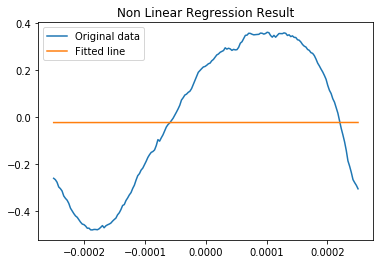

In [132]:
plt.plot(tempx, tempy, label ='Original data') 
plt.plot(tempx, predictions, label ='Fitted line') 
plt.title('Non Linear Regression Result') 
plt.legend() 
plt.show() 

In [146]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * np.sin(b * x) + c

params, params_covariance = optimize.curve_fit(test_func, tempx, tempy,
                                               p0=[0.1, 0.2, 0.4])

print(params)


[3.44539834e-01 1.15969288e+04 3.34491324e-08]


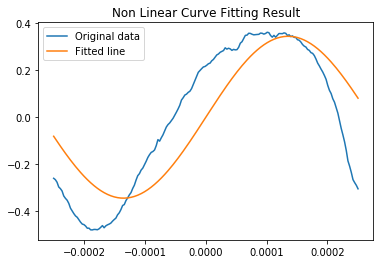

In [147]:
plt.plot(tempx, tempy, label ='Original data') 
plt.plot(tempx, test_func(tempx, params[0], params[1], params[2]), label ='Fitted line') 
plt.title('Non Linear Curve Fitting Result') 
plt.legend() 
plt.show() 